In [1]:
import networkx as nx           # networkxモジュールを nx という別名で読み込み
import matplotlib.pyplot as plt # 描画用モジュールの読み込み
# 図の表示用のマジックコマンド 
%matplotlib inline  

In [2]:
G = nx.Graph()     #（無向）グラフ G の生成

D = nx.DiGraph()   #有向グラフ D の生成

In [3]:
G = nx.Graph()
G

In [4]:
G.add_node("Tokyo")
G.add_edge(1,2)


In [5]:
print(G.nodes)
print(G.edges)

['Tokyo', 1, 2]
[(1, 2)]


In [6]:
from pyvis.network import Network

## 問題（グラフの生成と描画）

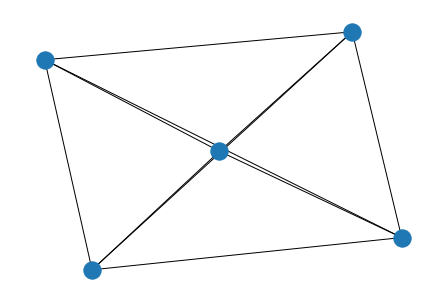

In [7]:
G = nx.Graph()       # グラフのインスタンスを生成
for i in range(5):
    for j in range(5):
        if i<j: #無向グラフなので，iより大きいjの場合だけ枝を生成
            G.add_edge(i, j)
nx.draw(G)   

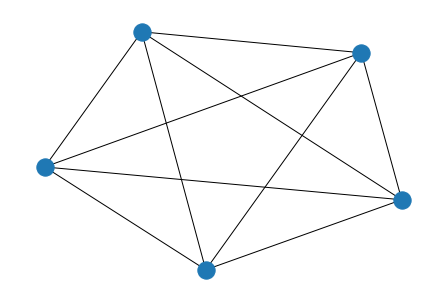

In [8]:
G = nx.complete_graph(5) #完全グラフを生成するcomplete_graph関数を利用
nx.draw(G)


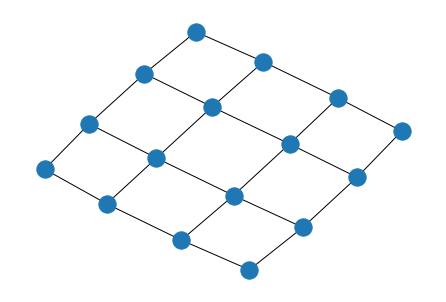

In [15]:
G = nx.grid_2d_graph(4,4)
nx.draw(G)

## 問題（3*3の格子グラフの枝の重みをランダムに設定）

In [ ]:
G = nx.grid_2d_graph(4,4)
nx.draw(G)

## 問題（描画の引数）

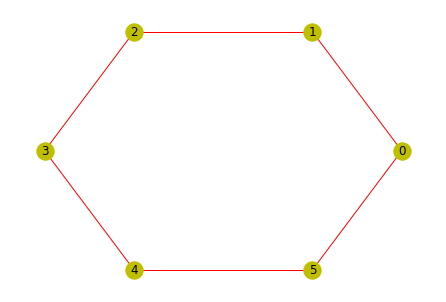

In [19]:
G=nx.cycle_graph(6)
pos=nx.kamada_kawai_layout(G)
nx.draw(G,pos=pos,edge_color="r",node_color="y", with_labels=True)

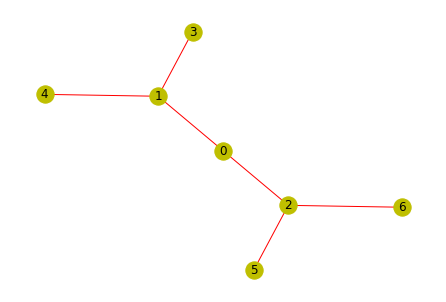

In [20]:
G=nx.balanced_tree(2,2)
pos=nx.kamada_kawai_layout(G)
nx.draw(G,pos=pos,edge_color="r",node_color="y", with_labels=True)

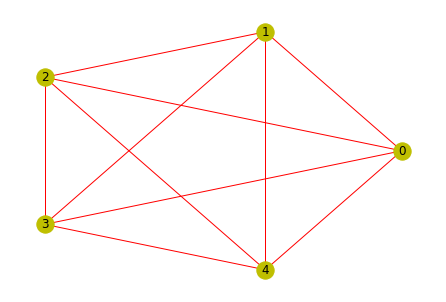

In [21]:
G=nx.complete_graph(5)
pos=nx.kamada_kawai_layout(G)
nx.draw(G,pos=pos,edge_color="r",node_color="y", with_labels=True)

## 問題（グラフに対する基本操作）

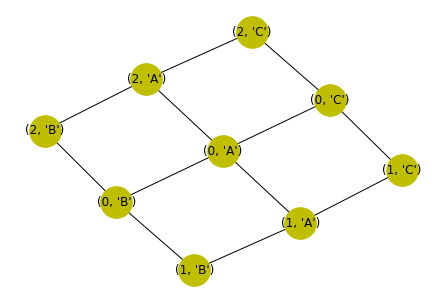

In [26]:
G = nx.Graph()
H = nx.Graph()
G.add_edges_from( [(0,1),(0,2)] )
H.add_edges_from([ ('A','B'),('A','C')] )
Product = nx.cartesian_product(G,H)
nx.draw(Product, with_labels=True, node_size=1000, node_color="y")

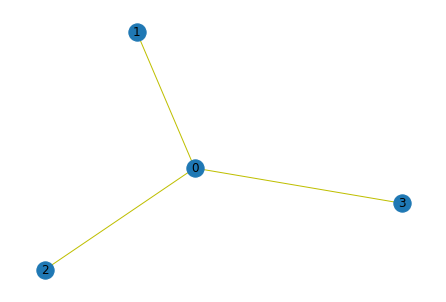

In [38]:
G = nx.Graph()
G.add_edges_from([(0,1),(0,2),(0,3)])
pos = nx.spring_layout(G)
nx.draw(G, pos=pos, edge_color ="y", with_labels=True)

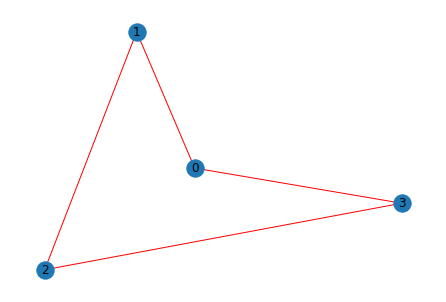

In [39]:
H = nx.cycle_graph(4)
nx.draw(H, pos=pos, edge_color="r", with_labels=True)

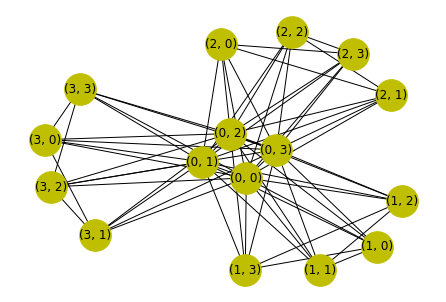

In [40]:
#辞書的積
Product = nx.lexicographic_product(G, H)
nx.draw(Product, with_labels=True, node_size=1000, node_color="y")

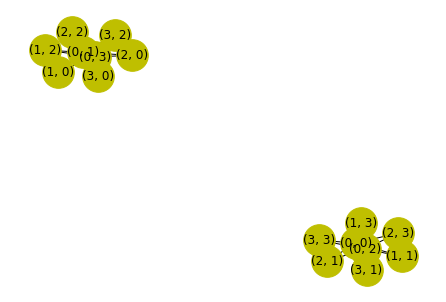

In [41]:
#テンソル積
Product = nx.tensor_product(G, H)
nx.draw(Product, with_labels=True, node_size=1000, node_color="y")

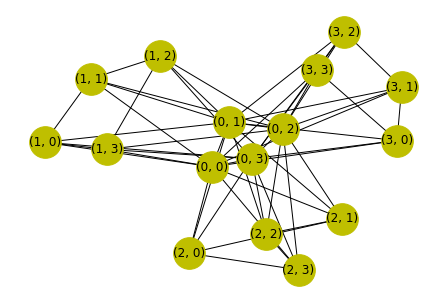

In [42]:
#強積
Product = nx.strong_product(G, H)
nx.draw(Product, with_labels=True, node_size=1000, node_color="y")

## 問題）（マッチングとEuler閉路）

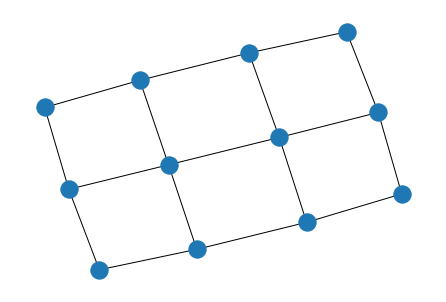

In [22]:
G = nx.grid_2d_graph(3,4)
nx.draw(G)

In [23]:
NewG = nx.eulerize(G)
print ("Eulerian?", nx.is_eulerian(NewG))
D = nx.MultiDiGraph()
for e in nx.eulerian_circuit(NewG):
    D.add_edge(e[0],e[1])

Eulerian? True


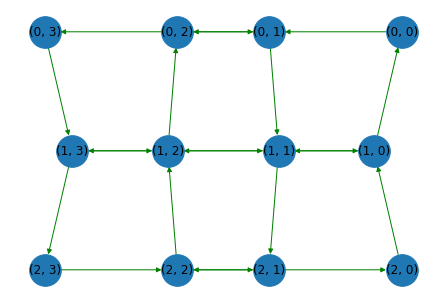

In [24]:
nx.draw_spectral(D,with_labels=True, node_size=1000,edge_color="g",width=1)